# Matthew Tan (21/478240/PA/20736)
# Rabbani Nur Kumoro (21/472599/PA/20310)

# Fake News Classification - SDG 16 (Peace, Justice, and Strong Institutions)
# Pattern Recognition - CS - Group Final Project



# **1. Import Libraries**

In [ ]:
import itertools
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import pandas as pd
import random
import re
import seaborn as sns

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from numpy import array, asarray, zeros
from sklearn import metrics, tree
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sistemcerdasfive/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# **2. Data Pre-Processing**

In [ ]:
news_data = pd.read_csv(r'/Users/sistemcerdasfive/tensorflow-test/Pattern Recognition/train_news.csv')
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news_data.shape

(20800, 5)

### 2.1 Missing Values

In [ ]:
# Missing Values in the Dataset
news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# Replacing the Null Values with an Empty String
news_data = news_data.fillna('')

In [ ]:
# Dataset after Data Cleaning
news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

### 2.2 Stemming

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    # Remove Single Characters
    review = re.sub(pattern=r'\s+[a-zA-Z]\s+', repl='', string=content)

    # Remove All Special Characters, Digits from 0-9, and Capital Letters
    review = re.sub(r'[^a-z\s]', ' ', string=content)

    # Remove URLs, Whitespace Characters
    review = re.sub(r'https?://\S+|www\.\S+', repl='', string=content)

    # Substituting Multiple Spaces with a Single Space
    review = re.sub(r'\s+', ' ', string=content)

    # Convert to Lowercase
    review = review.lower()

    # Split the Review into a List of Words
    review = review.split()

    # Apply Stemming to Each Word in the Review, Excluding Stopwords
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]

    # Join the Stemmed Words back into a Single String
    review = ' '.join(review)

    return review

In [ ]:
news_data['content'] = news_data['content'].apply(stemming)

In [ ]:
print(news_data['content'])

0        darrel lucu hous dem aide: didn’t even see com...
1        daniel j. flynn flynn: hillari clinton, big wo...
2                  consortiumnews.com truth might get fire
3        jessica purkiss 15 civilian kill singl us airs...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper t.i.: trump ’poster child ...
20796    benjamin hoffman n.f.l. playoffs: schedule, ma...
20797    michael j. de la merc rachel abram macy’ said ...
20798    alex ansari nato, russia hold parallel exercis...
20799                         david swanson keep f-35 aliv
Name: content, Length: 20800, dtype: object


In [ ]:
# Separating the Data and Label
X = news_data['content'].values
Y = news_data['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'
 'daniel j. flynn flynn: hillari clinton, big woman campu - breitbart'
 'consortiumnews.com truth might get fire' ...
 'michael j. de la merc rachel abram macy’ said receiv takeov approach hudson’ bay - new york time'
 'alex ansari nato, russia hold parallel exercis balkan'
 'david swanson keep f-35 aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
Y.shape

(20800,)

# **3. Exploratory Data Analysis**

### 3.1 Frequent Words that Present on Real News

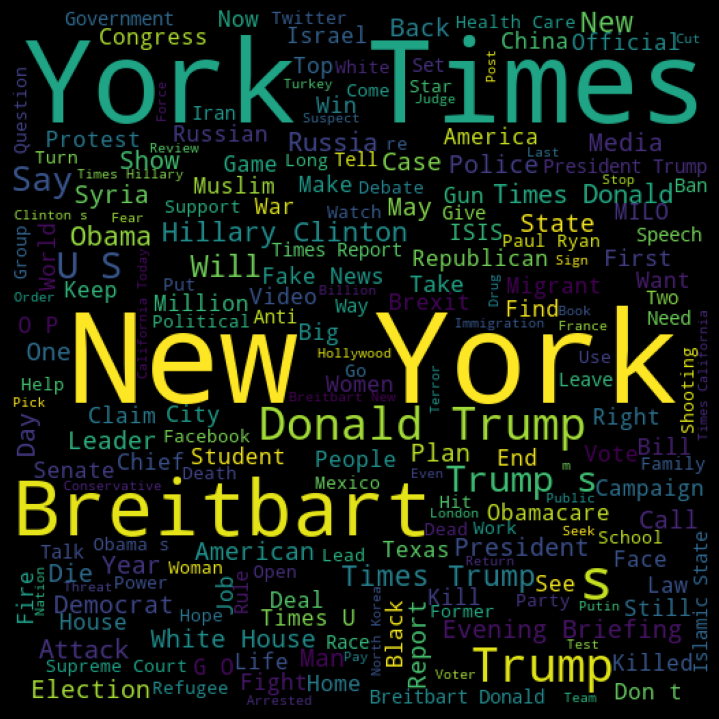

In [ ]:
# Frequent Real Words
real=' '.join(list(news_data[news_data['label']==0]['title']))
real=WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 3.2 Frequent Words that Presents on Fake News

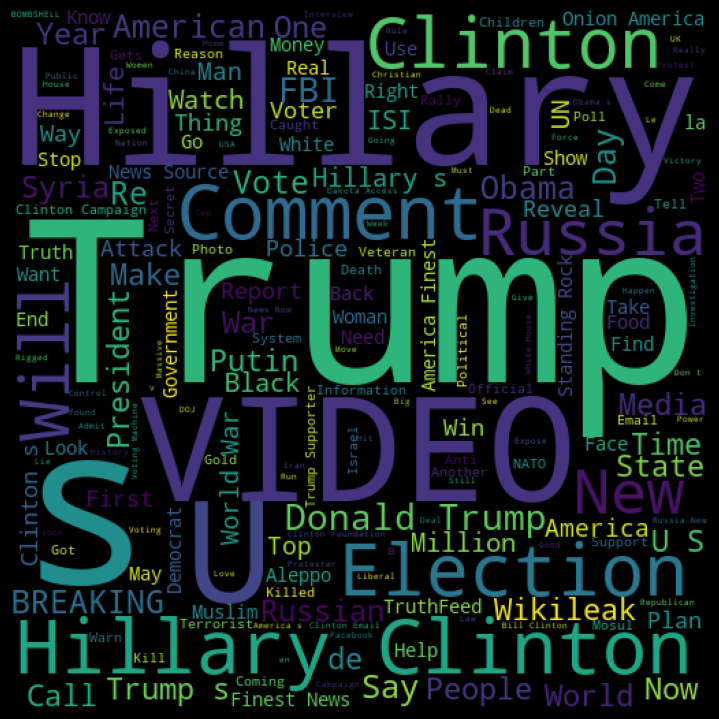

In [ ]:
# Frequent Fake Words
fake=' '.join(list(news_data[news_data['label']==1]['title']))
fake=WordCloud(width=512, height=512).generate(fake)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **4. Feature Selection**

### 4.1 Merging 2 Features into 1 Feature

In [ ]:
# Merging the Author's Name and News Title
news_data['content'] = news_data['author']+' '+news_data['title']

In [ ]:
# Result after Merger
print(news_data['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


### 4.2 Separating Data and Label

In [ ]:
# Get the Independent Features
X = news_data.drop(columns='label', axis=1)

## Get the Dependent features
Y = news_data['label']

In [ ]:
Y.value_counts()

1    10413
0    10387
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

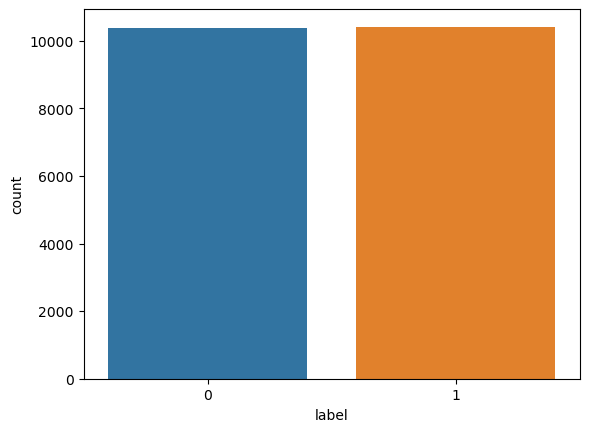

In [ ]:
sns.countplot(x = 'label', data =news_data)

In [ ]:
X.shape

(20800, 5)

In [ ]:
Y.shape

(20800,)

In [ ]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [ ]:
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


# **5. Feature Extraction**

### 5.1 TF-IDF Vectorizer

In [ ]:
# Converting the Textual Data to Numerical Data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 19097)	0.27315635150958634
  (0, 16473)	0.23676064517956455
  (0, 11072)	0.33384522056560495
  (0, 10747)	0.26822209263186303
  (0, 9692)	0.22757176689298134
  (0, 8832)	0.20534182453318398
  (0, 6433)	0.21422587910261737
  (0, 5256)	0.27468869329117757
  (0, 4995)	0.2512923264945339
  (0, 4763)	0.33044571153796654
  (0, 3952)	0.2266469969205269
  (0, 3403)	0.33756896138985654
  (0, 809)	0.3646500188253278
  (1, 20416)	0.29951908908156866
  (1, 8608)	0.19815023888659125
  (1, 7101)	0.711483310803025
  (1, 4728)	0.26268668599849243
  (1, 3778)	0.19062686807106288
  (1, 3100)	0.3870784468942128
  (1, 2713)	0.15460118725006144
  (1, 2258)	0.2928176012009572
  (2, 19015)	0.41491113753784553
  (2, 11878)	0.49151393723208897
  (2, 7650)	0.34605253138342823
  (2, 6968)	0.39293503470255664
  :	:
  (20797, 15142)	0.2718547014681534
  (20797, 14906)	0.24707379158386517
  (20797, 12685)	0.08013411384942215
  (20797, 11844)	0.17405416749037161
  (20797, 11767)	0.2945753459972408
  (20797, 11

# **6. Modelling**

### 6.1 Splitting the Dataset into Training and Test Data

In [ ]:
# Naïve Bayes
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.333, stratify=Y, random_state=42)

In [ ]:
# Decision Trees
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.333, stratify=Y, random_state=42)

### 6.2 Multinomial Naïve Bayes

In [ ]:
# Multinomial Naïve Bayes Modelling
model_NB=MultinomialNB()
model_NB.fit(X_train, Y_train)

MultinomialNB()

### 6.3 Decision Trees

In [ ]:
# Decision Trees Modelling
model_DT = DecisionTreeClassifier()
model_DT.fit(X1_train, Y1_train)

DecisionTreeClassifier()

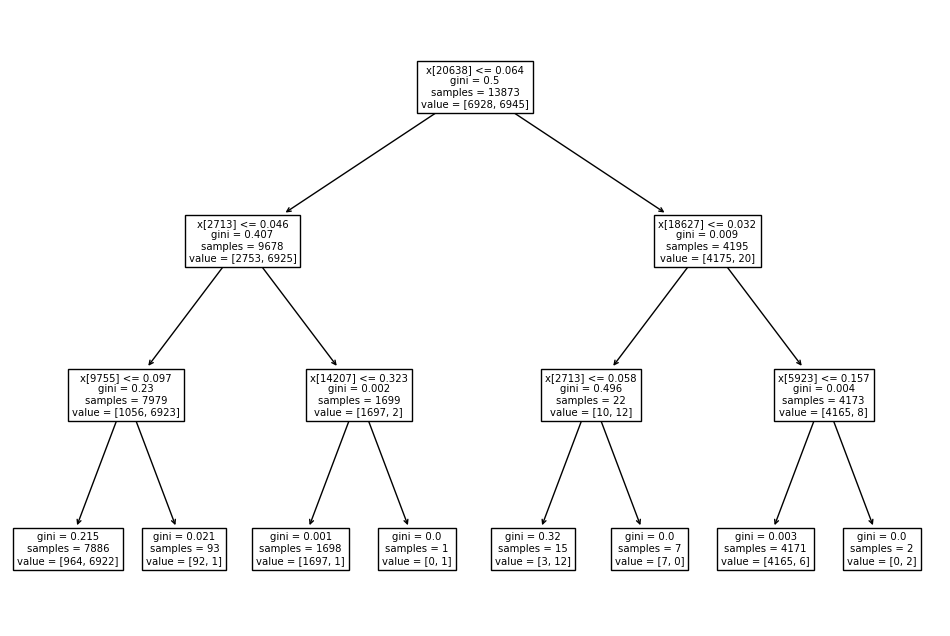

In [ ]:
# Train the Decision TreeS with a Maximum Depth
max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth)
decision_tree.fit(X1_train, Y1_train)

# Visualization of Decision Trees
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(decision_tree, ax=ax)
plt.show()

# **7. Results**

### 7.1 Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, Without Normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion Matrix, Without Normalization


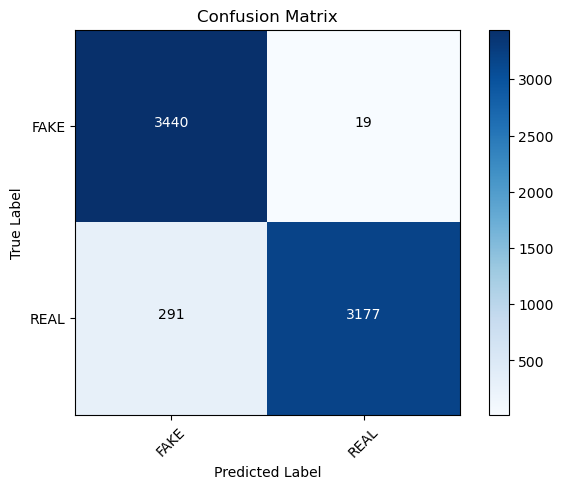

In [ ]:
# Confusion Matrix Plot for Multinomial Naïve Bayes
cm_NB = metrics.confusion_matrix(Y_test, predict_NB)
plot_confusion_matrix(cm_NB, classes=['FAKE', 'REAL'])

Confusion Matrix, Without Normalization


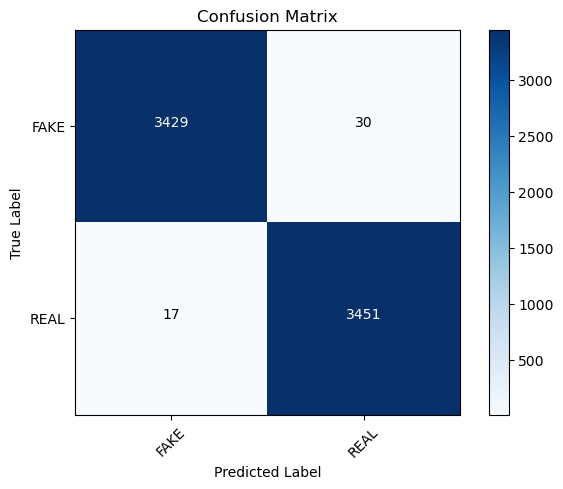

In [ ]:
# Confusion Matrix Plot for Decision Trees
cm_DT = metrics.confusion_matrix(Y1_test, predict_DT_Test)
plot_confusion_matrix(cm_DT, classes=['FAKE', 'REAL'])

### 7.2 Predictive Results

In [ ]:
# Predictive Results on Multinomial Naïve Bayes
X_new = X_test[0]

prediction = model_NB.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[1]
The news is Fake


In [ ]:
print(Y1_test[0])

1


In [ ]:
print(Y1_test[1])

0


In [ ]:
# Predictive Results on Decision Trees
X1_new = X1_test[0]

prediction = model_DT.predict(X1_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[1]
The news is Fake


In [ ]:
print(Y1_test[0])

1


In [ ]:
print(Y1_test[1])

0


# **8. Performance Evaluation**

### 8.1 Accuracy Score on Training and Test Data

In [ ]:
# Accuracy Score on the Training Data for Multinomial Naïve Bayes
predict_NB_Train = model_NB.predict(X_train)
NB_Train_Accuracy = metrics.accuracy_score(predict_NB_Train, Y_train)
print('Accuracy Score of Multinomial Naïve Bayes on the Training Data : ', NB_Train_Accuracy)

# Accuracy Score on the Test Data for Multinomial Naïve Bayes
predict_NB_Test = model_NB.predict(X_test)
NB_Test_Accuracy = metrics.accuracy_score(predict_NB_Test, Y_test)
print('Accuracy Score of Multinomial Naïve Bayes on the Test Data : ', NB_Test_Accuracy)

Accuracy Score of Multinomial Naïve Bayes on the Training Data :  0.9798889930080011
Accuracy Score of Multinomial Naïve Bayes on the Test Data :  0.9552475819257976


In [ ]:
# Accuracy Score on the Training Data for Decision Trees
predict_DT_Train = model_DT.predict(X1_train)
DT_Train_Accuracy = metrics.accuracy_score(predict_DT_Train, Y1_train)
print('Accuracy Score of Decision Trees on the Training Data : ', DT_Train_Accuracy)

# Accuracy Score on the Test Data for Decision Trees
predict_DT_Test = model_DT.predict(X1_test)
DT_Test_Accuracy = metrics.accuracy_score(predict_DT_Test, Y1_test)
print('Accuracy Score of Decision Trees on the Test Data : ', DT_Test_Accuracy)

Accuracy Score of Decision Trees on the Training Data :  1.0
Accuracy Score of Decision Trees on the Test Data :  0.9932149559693951


### 8.2 Classification Report

In [ ]:
# Classification Report for Multinomial Naïve Bayes
print(classification_report(Y_test,predict_NB))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      3459
           1       0.99      0.92      0.95      3468

    accuracy                           0.96      6927
   macro avg       0.96      0.96      0.96      6927
weighted avg       0.96      0.96      0.96      6927



In [ ]:
# Classification Report for Decision Trees
print(classification_report(Y1_test, predict_DT_Test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3459
           1       0.99      1.00      0.99      3468

    accuracy                           0.99      6927
   macro avg       0.99      0.99      0.99      6927
weighted avg       0.99      0.99      0.99      6927

